# Regresión lineal simple

## Importación de biblotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_squared_log_error

## Generación de datos

In [ ]:
# Generamos datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

## Visualización de datos

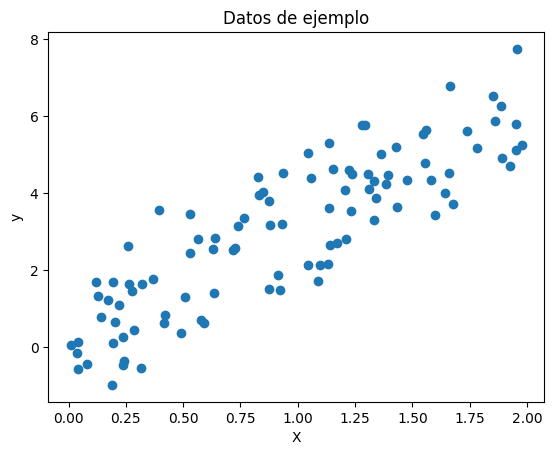

In [ ]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos de ejemplo')
plt.show()

## Modelo


In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instancia y entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Visualización de la regresión

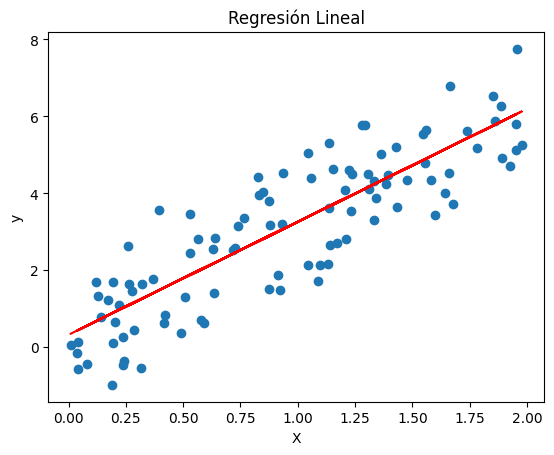

In [ ]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')  # Línea de regresión
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.show()

## Evaluación del modelo

In [ ]:
# Evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Impresión de coeficientes e métricas
intercept = model.intercept_[0]
betas = model.coef_[0]
print('Coeficiente:', betas[0])
print('Intercepto:', intercept)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)

print()
print("Métricas del Modelo:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Índice de Variación Explicada (EV): {ev:.2f}")

Coeficiente: 2.9364715078262473
Intercepto: 0.3223585304213441

Métricas del Modelo:
Error Cuadrático Medio (MSE): 1.04
Raíz del Error Cuadrático Medio (RMSE): 1.02
Error Absoluto Medio (MAE): 0.90
Coeficiente de Determinación (R²): 0.74
Índice de Variación Explicada (EV): 0.77


## Ecuación resultante

In [ ]:
# Create the equation string
equation = f"Y = {intercept:.2f}"

for i, beta in enumerate(betas):
    equation += f" + {beta:.2f}X{i+1}"

print("Ecuación lineal:")
print(equation)

Linear Regression Equation:
Y = 0.32 + 2.94X1


# Support Vector Regression (SVR)

## Importación de biblotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_squared_log_error

## Generación de datos

In [ ]:
# Generamos datos de ejemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(20))  # Agregar ruido

## Visualización de datos

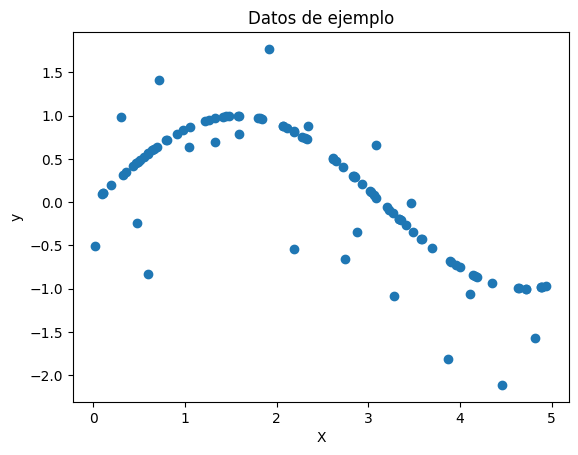

In [ ]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos de ejemplo')
plt.show()

## Modelo


In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creamos el modelo SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

## Visualización de la regresión

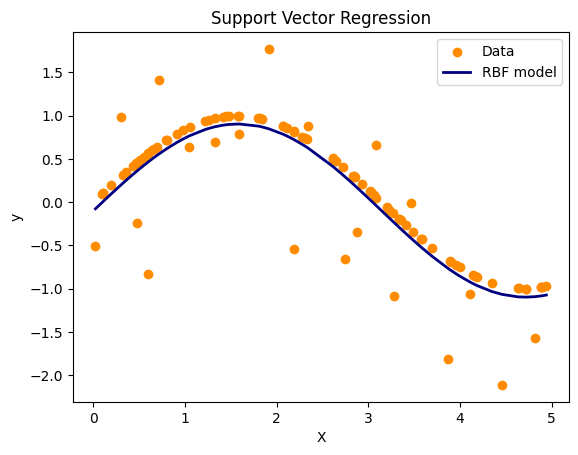

In [ ]:
# Visualizamos el modelo SVR
plt.scatter(X, y, color='darkorange', label='Data')
plt.plot(X, svr_rbf.predict(X), color='navy', lw=2, label='RBF model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## Evaluación del modelo

In [ ]:
# Evaluación del modelo en el conjunto de prueba
y_pred = svr_rbf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)

print()
print("Métricas del Modelo:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Índice de Variación Explicada (EV): {ev:.2f}")


Métricas del Modelo:
Error Cuadrático Medio (MSE): 0.07
Raíz del Error Cuadrático Medio (RMSE): 0.27
Error Absoluto Medio (MAE): 0.18
Coeficiente de Determinación (R²): 0.86
Índice de Variación Explicada (EV): 0.86


## Ecuación resultante

In [ ]:
# Obtener los coeficientes y vectores de soporte
alphas = svr_rbf.dual_coef_
support_vectors = svr_rbf.support_vectors_
coef = alphas.dot(support_vectors)

# Obtener el término de sesgo
intercept = svr_rbf.intercept_

# Imprimir la ecuación
equation = "y(x) = "
for i in range(len(coef[0])):
    equation += f"({coef[0][i]:.3f} * K(x, x{i+1})) + "
equation += f"{intercept[0]:.3f}"
print("Ecuación resultante:")
print(equation)

Ecuación resultante:
y(x) = (6.792 * K(x, x1)) + -0.292
